# 以布林带测算最后一个交易日可买股票

In [3]:
import warnings
warnings.filterwarnings('ignore')

from datetime import date
import pyfolio as pf
import pandas as pd
import talib
from QUANTAXIS import QA_fetch_stock_day_adv
from QUANTAXIS import QA_fetch_stock_list_adv
from QUANTAXIS import QA_fetch_index_day_adv

In [4]:
#设定绘图的默认大小
import matplotlib
matplotlib.rcParams["figure.figsize"]=[16,5]

#加载 seaborn，并且设置默认使用 seaborn
import seaborn as sns
sns.set()

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Noto Sans CJK SC','SimHei']
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [5]:
# import logging
# import sys

# # Create logger
# logger = logging.getLogger()
# logger.setLevel(logging.Info)

# # Create STDERR handler
# handler = logging.StreamHandler(sys.stderr)
# # ch.setLevel(logging.DEBUG)

# # # Create formatter and add it to the handler
# # formatter = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
# # handler.setFormatter(formatter)

# # Set STDERR handler as the only handler 
# logger.handlers = [handler]

In [6]:
def _format_date(date_value: date, fmt='%Y-%m-%d'):
    # pylint: disable=C0301
    """格式化输出日期类型数据


    Args:
        date_value:
        fmt: 格式化字符串。
            参考：https://docs.python.org/zh-cn/3.7/library/datetime.html#strftime-and-strptime-behavior

    Returns:

    """
    return date_value.strftime(fmt)


def _calc_bbands_cross(s: pd.Series,
                       ma_type: talib.MA_Type,
                       timeperiod=5,
                       nbdevup=2,
                       nbdevdn=2):
    """计算穿越布林带的数据

    Args:
        timeperiod: 时间段
        nbdevup: 上轨与平均值无偏差的标准差的数量
        nbdevdn: 下轨与平均值无偏差的标准差的数量
        s: 原始值
        ma_type:

    Returns:
        [低于下轨的`pd.Series`，超过上轨的`pd.Series`]

    """
    upper, middle, lower = talib.BBANDS(
        s,
        matype=ma_type,
        timeperiod=timeperiod,
        nbdevup=nbdevup,
        nbdevdn=nbdevdn)
    return s[lower > s], s[upper < s]

def _calc_daily_return(s:pd.Series):
    return (s / s.shift(1) - 1)[1:]

def _split_daily_return_to_year(s:pd.Series)->pd.DataFrame:
    """将日收益拆分成包含年份数据的DataFrame"""
    df=pd.DataFrame(s)
    
def _test_index(code,start='2018-01-01',end='2018-12-31'):
    """测试指数数据是否在本地能读取到
    
    Return:
        如果数据读取正常，则返回True，否则返回False
    """
    return not QA_fetch_index_day_adv(code,start,end).data.empty

def _get_zs_code():
    """获取示例时的指数（沪深300）代码，返回000300或者399300"""

    ZS_CODE=['399300','000300']#指数代码。沪深300
    for z in ZS_CODE:
        if _test_index(z):
            return z
    if not isinstance(ZS_CODE, str):
        raise AssertionError

In [72]:
'获取本地股票列表'
lst = QA_fetch_stock_list_adv()

start_date=date(1991,1,1)
start_str = _format_date(start_date)
'开始日期:{0}'.format(start_str)
end_str = _format_date(date.today())
'结束日期:{0}'.format(end_str)

zs_code=_get_zs_code()
'指数代码:{0}'.format(zs_code)

cur_month=date.today().month
cur_year=date.today().year
cur_day=date.today().day

'今天:{0}'.format(date.today())
'今天:{0}'.format(cur_day)
'今年:{0}'.format(cur_year)
'当月:{0}'.format(cur_month)



# logging.debug('获取到所有列表的QADataStruct格式的股票日线数据')
# data = QA_fetch_stock_day_adv(lst['code'].tolist(), start_str, end_str)

'获取本地股票列表'

'开始日期:1991-01-01'

'结束日期:2019-01-25'

'指数代码:399300'

'今天:2019-01-25'

'今天:25'

'今年:2019'

'当月:1'

##### 复权计算的意义

https://www.zhihu.com/question/31004373

> 前复权的意义是为了【技术指标】的连续性， 后复权的意义是为了【股价走势】的连续性， 不复权的意义是最直观的显示股价除权除息后【填权】还是【贴权】的走势。

In [14]:
from QUANTAXIS.QAData import QA_DataStruct_Stock_day

def _trans_daily_include_date(data):
    """取data中的close，并增加year，month信息，组合成一个新的DataFrame"""
    return pd.DataFrame({'close':data.close,'year':data.datetime.year,'month':data.datetime.month})

def _trans_daily(data):
    """
    
    Args:
        data: 不复权的日线数据
        
    Returns:
        [不复权日线,前复权日线,后复权日线,增加了年份和月份列的前复权日线]
    """
    
    if not isinstance(data,QA_DataStruct_Stock_day):
        return data,pd.DataFrame.empty,pd.DataFrame.empty,_trans_daily_include_date(data)
    data_qfq=data.to_qfq()#前复权
    data_hfq=data.to_hfq()#后复权
    '日收盘价(不复权)'
    data_bfq.close.tail()
    '日收盘价(前复权)'
    data_qfq.close.tail()
    '日收盘价(后复权)'
    data_hfq.close.tail()
    '日收益（前复权）'
    daily_return_qfq=_calc_daily_return(data_qfq.close)
    daily_return_qfq.tail()
    '增加包含年度信息的前复权日收盘价 DataFrame'
    df=_trans_daily_include_date(data_qfq)
    df.tail()
    return data,data_qfq,data_hfq,df

### 指数日收益数据

In [53]:
zs_data=QA_fetch_index_day_adv(zs_code,start_str,end_str)#不复权的价格
zs_daily,zs_daily_qfq,zs_daily_hfq,zs_daily_date=_trans_daily(zs_data)

Timestamp('2005-01-04 00:00:00')

In [73]:
'根据指数开始日期调整数据获取日期'
start_date=zs_data.data.index.levels[0][0]
start_str = _format_date(start_date)
'开始日期:{0}'.format(start_str)

'根据指数开始日期调整数据获取日期'

'开始日期:2005-01-04'

In [55]:
symbol=lst['code'][0]
data_bfq=QA_fetch_stock_day_adv(symbol,start_str,end_str)#不复权的价格
data,data_qfq,data_hfq,df=_trans_daily(data_bfq)
data_qfq_daily_return=_calc_daily_return(data_qfq.close)#单支股票前复权后的日回报数据
zs_data_daily_return=_calc_daily_return(zs_data.close)#指数日回报数据

In [68]:
data_qfq_daily_return.tail()
zs_data_daily_return.tail()

date        code  
2019-01-18  000001    0.017561
2019-01-21  000001   -0.008629
2019-01-22  000001   -0.005803
2019-01-23  000001    0.006809
2019-01-24  000001    0.016425
Name: close, dtype: float64

date        code  
2019-01-18  399300    0.018239
2019-01-21  399300    0.005514
2019-01-22  399300   -0.013285
2019-01-23  399300   -0.000722
2019-01-24  399300    0.005645
Name: close, dtype: float64

##### Alpha

投資中面臨着系統性風險（即Beta）和非系統性風險（即Alpha），Alpha是投資者獲得與市場波動無關的回報。比如投資者獲得了15%的回報，其基準獲得了10%的回報，那麼Alpha或者價值增值的部分就是5%。

In [69]:
'相对于 {0} 的 Alpha:{1}'.format(zs_code,pf.timeseries.alpha(data_qfq_daily_return.reset_index().drop(columns=['code']).set_index('date'),zs_data_daily_return.reset_index().drop(columns=['code']).set_index('date')))

'相对于 399300 的 Alpha:0.11773883390017018'

##### Beta

表示投資的系統性風險，反映了策略對大盤變化的敏感性。例如一個策略的Beta為1.5，則大盤漲1%的時候，策略可能漲1.5%，反之亦然；如果一個策略的Beta為-1.5，説明大盤漲1%的時候，策略可能跌1.5%，反之亦然。

In [71]:
'相对于 {0} 的 Beta:{1}'.format(zs_code,pf.timeseries.beta(data_qfq_daily_return.reset_index().drop(columns=['code']).set_index('date'),zs_data_daily_return.reset_index().drop(columns=['code']).set_index('date')))

'相对于 399300 的 Beta:1.093277502156045'

##### SharpeRatio

核心思想：理性的投資者將選擇並持有有效的投資組合.

公式意義：夏普指數代表投資人每多承擔一分風險，可以拿到幾分收益；若為正值，代表基金收益率高過波動風險；若為負值，代表基金操作風險大過於收益率。每個投資組合都可以計算Sharpe ratio，即投資回報與多冒風險的比例，這個比例越高，投資組合越佳。

In [58]:
risk_free =0
'无风险回报为 {1} 时的 SharpeRatio:{0}'.format(pf.timeseries.sharpe_ratio(data_qfq_daily_return,risk_free),risk_free)

'无风险回报为 0 时的 SharpeRatio:0.5662733383856215'

##### Omega比率

介紹： Omega函數是用來分析收益分佈的一種方法，它是一種天然的業績指標。基於Omega的分析是在下跌，下偏矩和損益文獻的精神上進行的。Omega函數捕捉到在收益分佈上的所有高階矩信息並且影響收益水平的敏感性。

公式意義：Omega越高越好，它是對偏度和峯值的一個調整。

In [91]:
pf.timeseries.omega_ratio(data_qfq_daily_return,risk_free)

1.110000437556997

##### sortino比率

介紹： Sortino ratio是一個能夠評價投資資產、組合或者策略收益的指標。它是夏普比率的修正，它只對收益低於某個值的波動性進行衡量，這個值可能是持有者規定的目標收益或者是要求收益，而夏普比率是同時對上漲的和下降的波動進行衡量。儘管這兩個比率都衡量的是一個調整後的投資風險，但它們的意義卻不同，這導致投資的收益的結果不同。

核心思想： 公式及其解釋:R是資產或組合的預期收益，T是投資策略的目標或要求的收益，起源於最小可接受收益。DR是目標方差的平方根。也就是二階低偏矩。 Sharpe and Omega-Sharpe ratio的一個自然擴展就是由Sortino在1991年提出的，他使用的是downside risk作為分母，downside risk就是二階下偏矩。 總風險用下降風險所代替，因為投資組合經理不會被上漲的變化而懲罰，但會被低於最小目標收益的變化而懲罰。 用下降標準差而不是總標準差，以區別不利和有利的波動。

In [93]:
pf.timeseries.sortino_ratio(data_qfq_daily_return)

0.8657778929549902

##### 下降風險

In [94]:
pf.timeseries.downside_risk(data_qfq_daily_return)

0.2717280087409271

##### tail_ratio

In [59]:
pf.timeseries.tail_ratio(data_qfq_daily_return)

1.2435937334485347

##### 信息比率(Information Ratio)

信息比率主要是用來衡量某一投資組合優於一個特定指數的風險調整超額報酬，或者説是用來衡量超額風險所帶來的超額收益。它表示單位主動風險所帶來的超額收益。

Information Ratio = α∕ω (α為組合的超額收益，ω為主動風險)

計算信息比率時，可以將基金報酬率減去同類基金或者是大盤報酬率(剩下的值為超額報酬)，再除以該超額報酬的標準差。信息比率越高，該基金表現持續優於大盤的程度越高。

In [99]:
# from empyrical import information_ratio
# [Remove Information Ratio #41](https://github.com/quantopian/empyrical/issues/41)
# information_ratio(data_qfq_daily_return.reset_index().drop(columns=['code']).set_index('date'),zs_data_daily_return.reset_index().drop(columns=['code']).set_index('date'))

##### 年均回报

In [60]:
stock_aggregate_returns_year=pf.timeseries.aggregate_returns(data_qfq_daily_return.reset_index().drop(columns=['code']).set_index('date'),'yearly')
stock_aggregate_returns_year.tail()
# logging.debug('月均回报')
# logging.debug(pf.timeseries.aggregate_returns(data_qfq_daily_return.reset_index().drop(columns=['code']).set_index('date'),'monthly'))
# logging.debug('周均回报')
# logging.debug(pf.timeseries.aggregate_returns(data_qfq_daily_return.reset_index().drop(columns=['code']).set_index('date'),'weekly'))

,close
2015,-0.083614
2016,-0.075695
2017,0.482896
2018,-0.283641
2019,0.121535


###### 股票年均收益与指数年均收益的比较

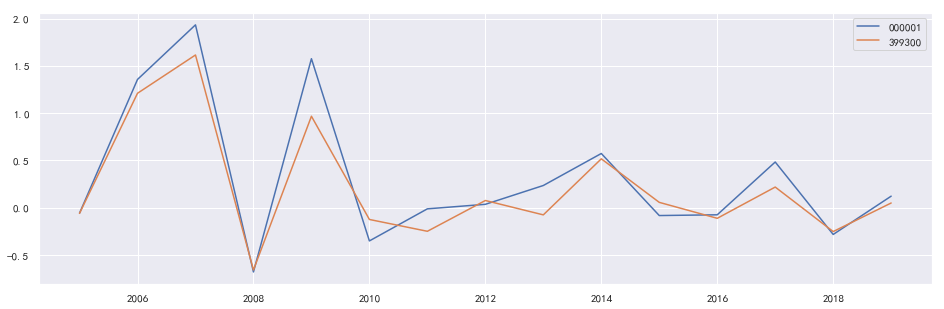

In [61]:
zs_aggregate_returns_year=pf.timeseries.aggregate_returns(zs_data_daily_return.reset_index().drop(columns=['code']).set_index('date'),'yearly')
pd.DataFrame({symbol:stock_aggregate_returns_year['close'],zs_code:zs_aggregate_returns_year['close']}).plot()

In [62]:
window=30 #窗口期

##### 确定策略的滚动夏普比率

In [63]:
rolling_sharpe=pf.timeseries.rolling_sharpe(data_qfq_daily_return,window)
rolling_sharpe.tail()

date        code  
2019-01-18  000001    0.079917
2019-01-21  000001    0.396694
2019-01-22  000001    0.134437
2019-01-23  000001    0.662208
2019-01-24  000001    0.967499
Name: close, dtype: float64

##### 按年份独立统计数据

,alpha,annual_return,annual_volatility,beta,cum_returns,downside_risk,sharp_ratio,sortino_ratio,tail_ratio
2005,0.062559,-0.064766,0.405177,1.292845,0.260335,0.260335,0.034015,0.052941,1.144956
2006,0.012614,1.681638,0.427758,1.082360,0.252901,0.252901,2.521914,4.265584,1.544002
2007,0.580156,2.531563,0.605185,0.938420,0.349341,0.349341,2.385805,4.133083,1.202562
2008,0.154224,-0.692184,0.661122,1.153815,0.493476,0.493476,-1.447830,-1.939692,0.913123
2009,0.267154,1.795068,0.483459,1.081092,0.277600,0.277600,2.367691,4.123489,1.443370
2010,-0.159894,-0.434245,0.369171,1.108643,0.279653,0.279653,-1.356461,-1.790667,1.006241
2011,0.258406,-0.013519,0.267626,0.953755,0.184562,0.184562,0.082084,0.119027,1.033195
2012,0.011003,0.038173,0.235678,0.941588,0.140400,0.140400,0.274794,0.461274,1.386784
2013,0.460359,0.250938,0.494122,1.735120,0.300523,0.300523,0.696019,1.144398,1.507932
2014,-0.081488,0.596577,0.329827,1.348603,0.190751,0.190751,1.582319,2.735984,1.681424


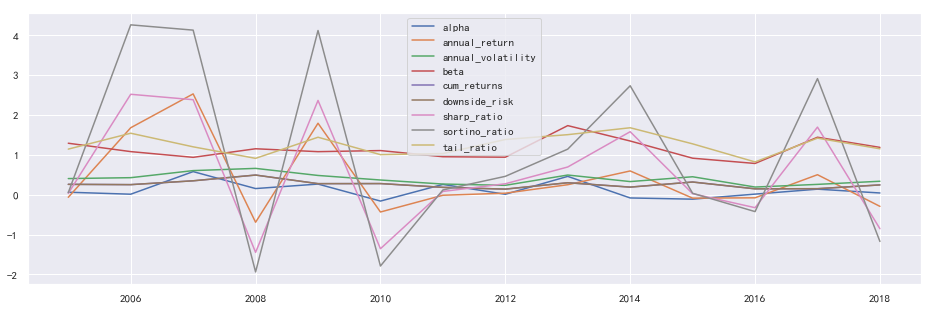

In [120]:
d={}
risk_free =0
for year in range(start_date.year,date.today().year):
    d[year]={}
    data_qfq_daily_return_remove_code=data_qfq_daily_return.reset_index().drop(columns=['code']).set_index('date')
    zs_daily_return_remove_code=zs_data_daily_return.reset_index().drop(columns=['code']).set_index('date')
    data_qfq_daily_return_remove_code_year=data_qfq_daily_return_remove_code[data_qfq_daily_return_remove_code.index.year==year]#当年股票日收益（前复权）
    zs_daily_return_remove_code_year=zs_daily_return_remove_code[zs_daily_return_remove_code.index.year==year]#当年指数日收益
    d[year]['alpha']=pf.timeseries.alpha(data_qfq_daily_return_remove_code_year,zs_daily_return_remove_code_year)
    d[year]['beta']=pf.timeseries.beta(data_qfq_daily_return_remove_code_year,zs_daily_return_remove_code_year)
    d[year]['sharp_ratio']=pf.timeseries.sharpe_ratio(data_qfq_daily_return_remove_code_year,risk_free)[0]
    d[year]['tail_ratio']=pf.timeseries.tail_ratio(data_qfq_daily_return_remove_code_year)
    d[year]['annual_return']=pf.timeseries.annual_return(data_qfq_daily_return_remove_code_year)[0]#年化收益
    d[year]['annual_volatility']=pf.timeseries.annual_volatility(data_qfq_daily_return_remove_code_year)[0]#年化波动率
#     d[year]['omega_ratio']=pf.timeseries.omega_ratio(data_qfq_daily_return_remove_code_year,risk_free)#Omega比率
    d[year]['sortino_ratio']=pf.timeseries.sortino_ratio(data_qfq_daily_return_remove_code_year)[0]#sortino比率
    d[year]['downside_risk']=pf.timeseries.downside_risk(data_qfq_daily_return_remove_code_year)[0]#下降风险
    d[year]['cum_returns']=pf.timeseries.downside_risk(data_qfq_daily_return_remove_code_year)[0]
#     d[year]['open_hfq']=data_hfq.head(1)['close'][0]
#     d[year]['close_hfq']=data_hfq.head(1)['close'][0]
#     d[year]['open_qfq']=data_qfq.head(1)['close'][0]
#     d[year]['close_qfq']=data_qfq.head(1)['close'][0]
#     d[year]['change_qfq']=d[year]['close_qfq']-d[year]['open_qfq']
#     d[year]['change_hfq']=d[year]['close_hfq']-d[year]['open_hfq']
#     d[year]['aggregate_returns']=np.(data_qfq_daily_return_remove_code,'yearly')
pd.DataFrame.from_dict(d).T
pd.DataFrame.from_dict(d).T.plot()